In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2023-07-23 16:40:07.199233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
!pip install protobuf==3.19.0

     |████████████████████████████████| 1.0 MB 2.4 MB/s eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.25.0 requires protobuf<5,>=3.20, but you have protobuf 3.19.0 which is incompatible.


In [6]:
!pip install --upgrade streamlit

  Using cached protobuf-4.23.4-cp37-abi3-macosx_10_9_universal2.whl (400 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.0
    Uninstalling protobuf-3.19.0:
      Successfully uninstalled protobuf-3.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.4 which is incompatible.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you have protobuf 4.23.4 which is incompatible.


In [7]:
!streamlit hello


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  ^C
2023-07-23 16:58:31.758 


In [9]:
!streamlit --version

Streamlit, version 1.25.0


In [10]:
# Define constants for dataset preparation and model training
NUM_FRAMES = 30
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [11]:
# Define a function to extract frames from a video file
def extract_frames(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (IMG_HEIGHT, IMG_WIDTH))
        frames.append(frame)
        frame_count += 1
        if frame_count == NUM_FRAMES:
            break
    cap.release()
    if len(frames) < NUM_FRAMES:
        padding = [np.zeros((IMG_HEIGHT, IMG_WIDTH, 3))] * (NUM_FRAMES - len(frames))
        frames.extend(padding)
    return frames

In [12]:
# Define a function to prepare the dataset for training and testing
def prepare_dataset(fight_dir, non_fight_dir):
    fight_frames = []
    non_fight_frames = []
    for file in os.listdir(fight_dir):
        file_path = os.path.join(fight_dir, file)
        frames = extract_frames(file_path)
        fight_frames.extend(frames)
    for file in os.listdir(non_fight_dir):
        file_path = os.path.join(non_fight_dir, file)
        frames = extract_frames(file_path)
        non_fight_frames.extend(frames)
    X = np.array(fight_frames + non_fight_frames)
    y = np.concatenate([np.ones(len(fight_frames)), np.zeros(len(non_fight_frames))])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = X_train.reshape(X_train.shape[0], IMG_HEIGHT, IMG_WIDTH, 3)
    X_test = X_test.reshape(X_test.shape[0], IMG_HEIGHT, IMG_WIDTH, 3)
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    return X_train, X_test, y_train, y_test

In [13]:
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2023-07-23 17:05:08.973610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Prepare the dataset for training and testing
#/Users/elijahadedamola/Downloads/(P-009831)_Artefact/data/fights
fight_dir = r'/Users/elijahadedamola/Downloads/(P-009831)_Artefact/data/fights'
non_fight_dir = r'/Users/elijahadedamola/Downloads/(P-009831)_Artefact/data/noFights'

In [15]:
X_train, X_test, y_train, y_test = prepare_dataset(fight_dir, non_fight_dir)

In [17]:
history = model.fit(X_train,y_train,epochs=5, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/5
901/901 [==============================] - 1314s 1s/step - loss: 0.1040 - accuracy: 0.9611 - val_loss: 0.0257 - val_accuracy: 0.9903
Epoch 2/5
901/901 [==============================] - 606s 671ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0100 - val_accuracy: 0.9972
Epoch 3/5
901/901 [==============================] - 658s 729ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0201 - val_accuracy: 0.9925
Epoch 4/5
901/901 [==============================] - 1382s 2s/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0540 - val_accuracy: 0.9878
Epoch 5/5
901/901 [==============================] - 1383s 2s/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0028 - val_accuracy: 0.9989


In [19]:
import pandas as pd
model_performance = pd.DataFrame(history.history)
model.plot()

AttributeError: 'Sequential' object has no attribute 'plot'

In [20]:
predictions = model.predict(X_test)

226/226 [==============================] - 78s 339ms/step


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

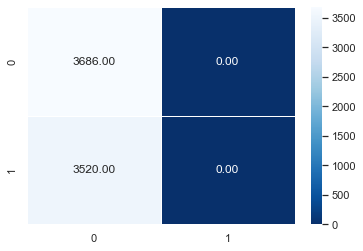

In [22]:
import seaborn as sns 
sns.set_style('whitegrid')
sns.set_context('notebook')

_ = sns.heatmap(confusion_matrix(y_test,predictions.argmax(axis=1)), cmap="Blues_r", lw=.5, annot=True, fmt=".2f")


In [23]:
print(classification_report(y_test,predictions.argmax(axis=1)))

/usr/local/Caskroom/miniforge/base/envs/py3k/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Caskroom/miniforge/base/envs/py3k/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68      3686
         1.0       0.00      0.00      0.00      3520

    accuracy                           0.51      7206
   macro avg       0.26      0.50      0.34      7206
weighted avg       0.26      0.51      0.35      7206



/usr/local/Caskroom/miniforge/base/envs/py3k/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
model.save("MyModel.h5")

In [25]:
!streamlit run Downloads/(P-009831)_Artefact/code1.py

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `streamlit run Downloads/(P-009831)_Artefact/code1.py'
